# Data Preparation

### Import the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from scipy.stats import skew, kurtosis, zscore, mstats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/homebrew/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/homebrew/Cellar/python@3.10/3.10.15/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/isorokin/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/isoro

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

### Create DataFrame

In [337]:
df = pd.DataFrame(pd.read_csv('bitcoin_2017_to_2023.csv'))

## EDA of the DataSet

In this section, we will perform an Exploratory Data Analysis (EDA) on our dataset to gain insights into the structure, distribution, and relationships between the variables. Below is a brief description of the columns in our dataset:

| **Column**                   | **Description**                                                    |
|------------------------------|--------------------------------------------------------------------|
| `timestamp`                  | Timestamp of the data point.                                       |
| `open`                       | Opening price for that timestamp.                                  |
| `high`                       | Highest price during the timestamp interval.                       |
| `low`                        | Lowest price during the timestamp interval.                        |
| `close`                      | Closing price for the timestamp interval.                          |
| `volume`                     | Volume of trades for the specified timestamp range.                |
| `quote_asset_volume`         | Quote asset volume for the specified timestamp range.              |
| `number_of_trades`           | Number of trades executed during the specified timestamp range.    |
| `taker_buy_base_asset_volume`| Volume of the base asset bought by takers during the timestamp range. |
| `taker_buy_quote_asset_volume`| Volume of the quote asset bought by takers during the timestamp range. |


### Understanding the Structure of the Dataset

In [338]:
#Exploring the head of the dataset
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611


In [339]:
#Exploring the random sample
df.sample(10)

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
1638237,2020-06-19 11:54:00,9376.38,9379.17,9375.01,9376.87,10.265807,9.626108e+04,293,6.870538,64425.503757
152938,2023-04-17 08:21:00,29888.51,29888.52,29878.33,29884.03,21.296320,6.363520e+05,612,10.159160,303558.276909
1916138,2019-12-09 02:25:00,7480.78,7485.59,7480.26,7482.36,139.686274,1.045335e+06,223,86.508798,647332.851793
2372634,2019-01-24 20:45:00,3567.95,3568.51,3566.52,3567.09,12.415936,4.429266e+04,109,6.941357,24763.740037
1977472,2019-10-27 07:48:00,9159.06,9160.48,9155.31,9155.32,19.611721,1.796326e+05,157,6.464265,59205.944151
2347673,2019-02-11 04:46:00,3625.75,3626.18,3625.00,3626.03,6.501746,2.357340e+04,65,4.800874,17407.099722
2659210,2018-07-09 17:16:00,6695.40,6701.97,6692.99,6696.01,12.003603,8.038466e+04,70,5.469787,36638.674229
277806,2023-01-20 13:53:00,21065.06,21065.62,21053.06,21054.22,117.279530,2.469695e+06,3187,45.480730,957757.710896
3048845,2017-10-10 00:53:00,4878.44,4879.00,4858.00,4858.01,1.061018,5.157338e+03,35,0.237653,1157.091020
757597,2022-02-21 16:02:00,38904.48,38927.68,38850.60,38927.67,46.941640,1.825266e+06,850,15.339700,596547.570242


In [340]:
#Exploring the tail of the dataset
df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851


In [341]:
# Exploring the shape of the dataset
df.shape

(3126000, 10)

This dataset has over 3 Million instances and 10 featuers

In [342]:
# Shows general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 0 to 3125999
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


As we can see, the timestap type is 'object' which we will convert to 'datetime' later.

In [343]:
# Explore unique values of each feature
df.nunique()

timestamp                       3123928
open                            1784709
high                            1658845
low                             1666834
close                           1775966
volume                          2997695
quote_asset_volume              3099988
number_of_trades                  18985
taker_buy_base_asset_volume     2869878
taker_buy_quote_asset_volume    3063768
dtype: int64

In [344]:
# Find all of the missing values
df.isnull().sum()

timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
dtype: int64

As we can see, the dataset has no missing values!

### Data Distributions for Numerical Variables

In [345]:
# Important stats on each variable
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


Some general information that will be explored in detail later.

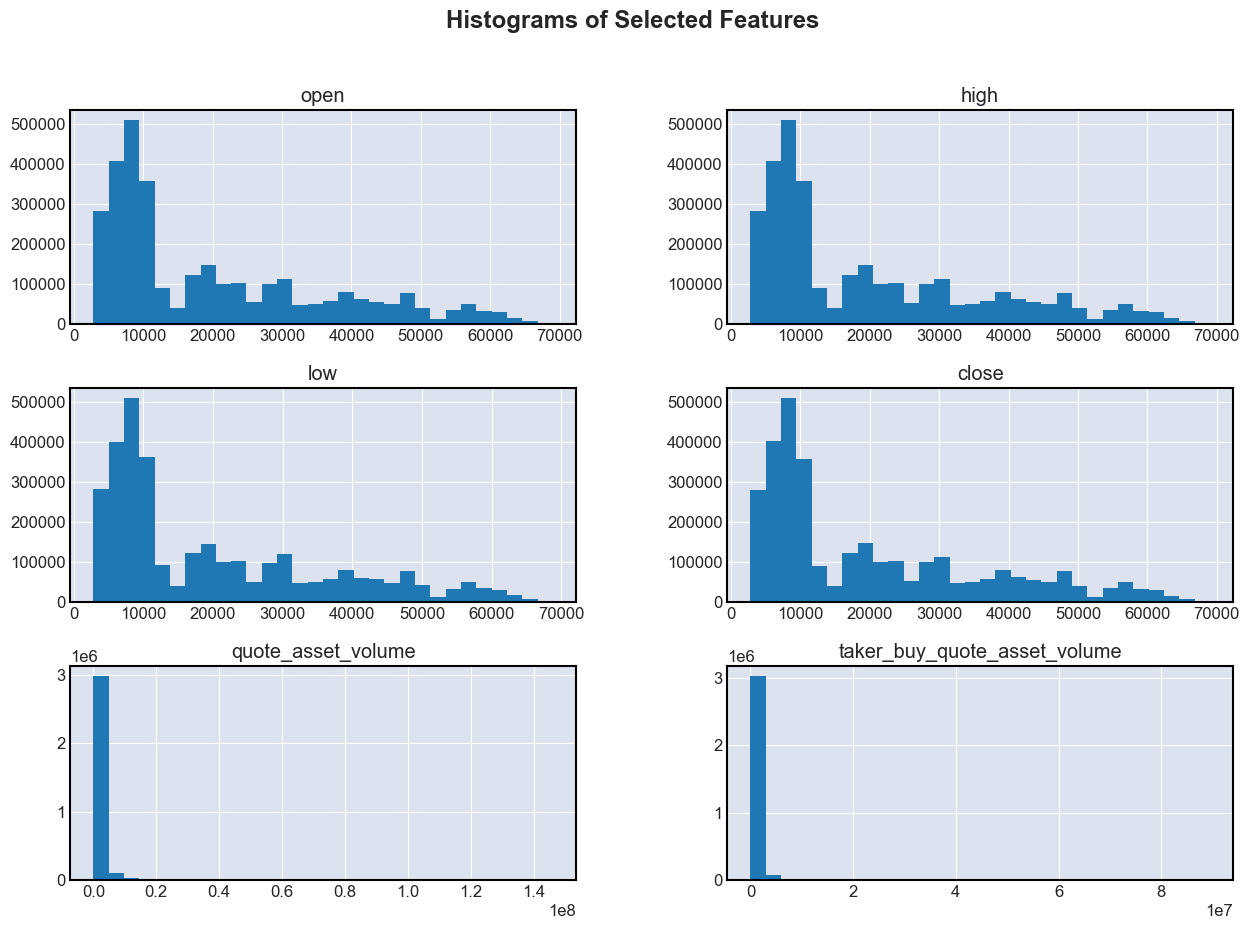

In [346]:
# Plotting Histograms for Numerical Featuers
# Features for histograms
hist_features = ['open', 'high', 'low', 'close', 'quote_asset_volume', 'taker_buy_quote_asset_volume']

# Plot histograms
df[hist_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

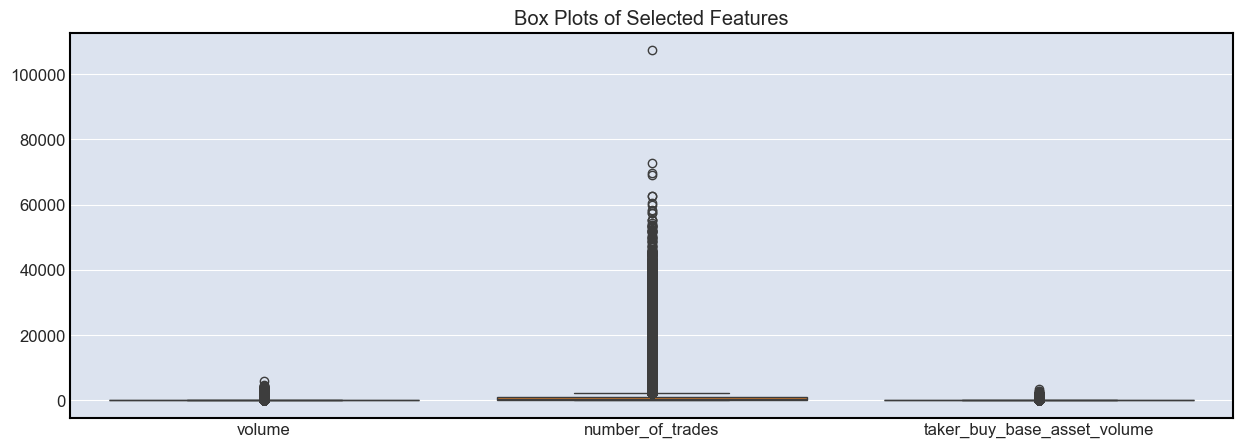

In [347]:
# Plot box plots to identify outliers
# Features for box plots
boxplot_features = ['volume', 'number_of_trades', 'taker_buy_base_asset_volume']

# Plot box plots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[boxplot_features])
plt.title('Box Plots of Selected Features')
plt.show()

<b>Mean and Standard Deviation:</b>

The average open, high, low, and close prices are close to each other, around $20,000, suggesting relatively consistent pricing across the dataset.
The standard deviation for these prices is around $16,000, indicating significant price fluctuations.
The volume and quote_asset_volume have high standard deviations, showing variability in trading activity.

<b>Minimum and Maximum Values:</b>

The minimum prices (open, high, low, and close) are as low as $2,817, while the maximum values reach $69,000. This reflects a wide range of market conditions, likely covering multiple market cycles (e.g., bull and bear periods).
There are timestamps where volume, quote_asset_volume, and number_of_trades are zero, indicating periods of no trading activity.

<b>Quartiles (25%, 50%, 75%):</b>

The 25th percentile (Q1) and 75th percentile (Q3) for the prices show a significant spread, with Q1 around $7,600 and Q3 close to $29,900. This highlights a skewed distribution, with more data points on the lower end and some high outliers.
The median (50%) values for the prices are around $11,700, which is lower than the mean, indicating a positive skew (i.e., a few high values increasing the average).
The volume and taker buy volumes are generally low in the lower quartiles but increase significantly by Q3, indicating periods of increased market activity.

<b>Outliers:</b>

The maximum values for volume (5,877.78), number_of_trades (107,315), and taker buy quote asset volume (89,475,510) are exceptionally high compared to their respective means, suggesting potential outliers or periods of unusually high market activity.

### Visualizing relationships between Variables 

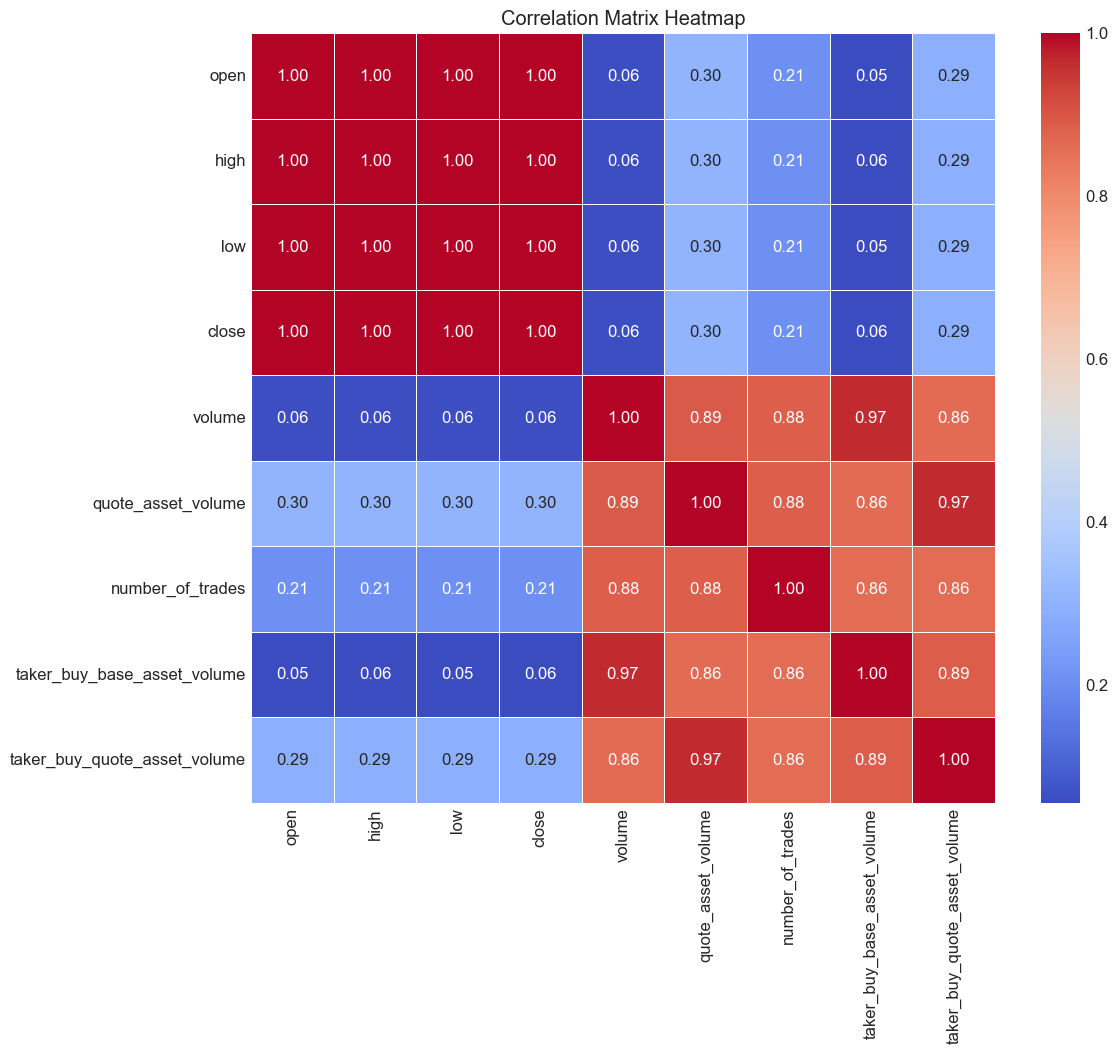

In [348]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

<b>High Correlation Among Price Features:</b>

The open, high, low, and close features have nearly perfect correlations (close to 1.0). This is expected because they are derived from the same price data for each timestamp and often move together in financial datasets.

<b>Volume and Price Features:</b>

volume has a very weak positive correlation (~0.06) with price-related features (open, high, low, close). This suggests that trading volume is not directly tied to price movements, at least in this dataset.

<b>Volume Features:</b>

volume shows a strong positive correlation with taker_buy_base_asset_volume (0.966) and a moderately strong correlation with quote_asset_volume (0.89).
quote_asset_volume and taker_buy_quote_asset_volume also have a very high correlation (0.965), indicating that these two metrics tend to move together.

<b>Trades and Volumes:</b>

number_of_trades has a strong positive correlation with volume (0.883), quote_asset_volume (0.885), and taker_buy_base_asset_volume (0.859). This indicates that higher trading activity often coincides with higher trading volumes.

<b>Relationship Between Taker Buy Volumes:</b>

taker_buy_base_asset_volume and taker_buy_quote_asset_volume have a very high correlation (0.889), as expected, since these features represent similar metrics in different units (base and quote assets).



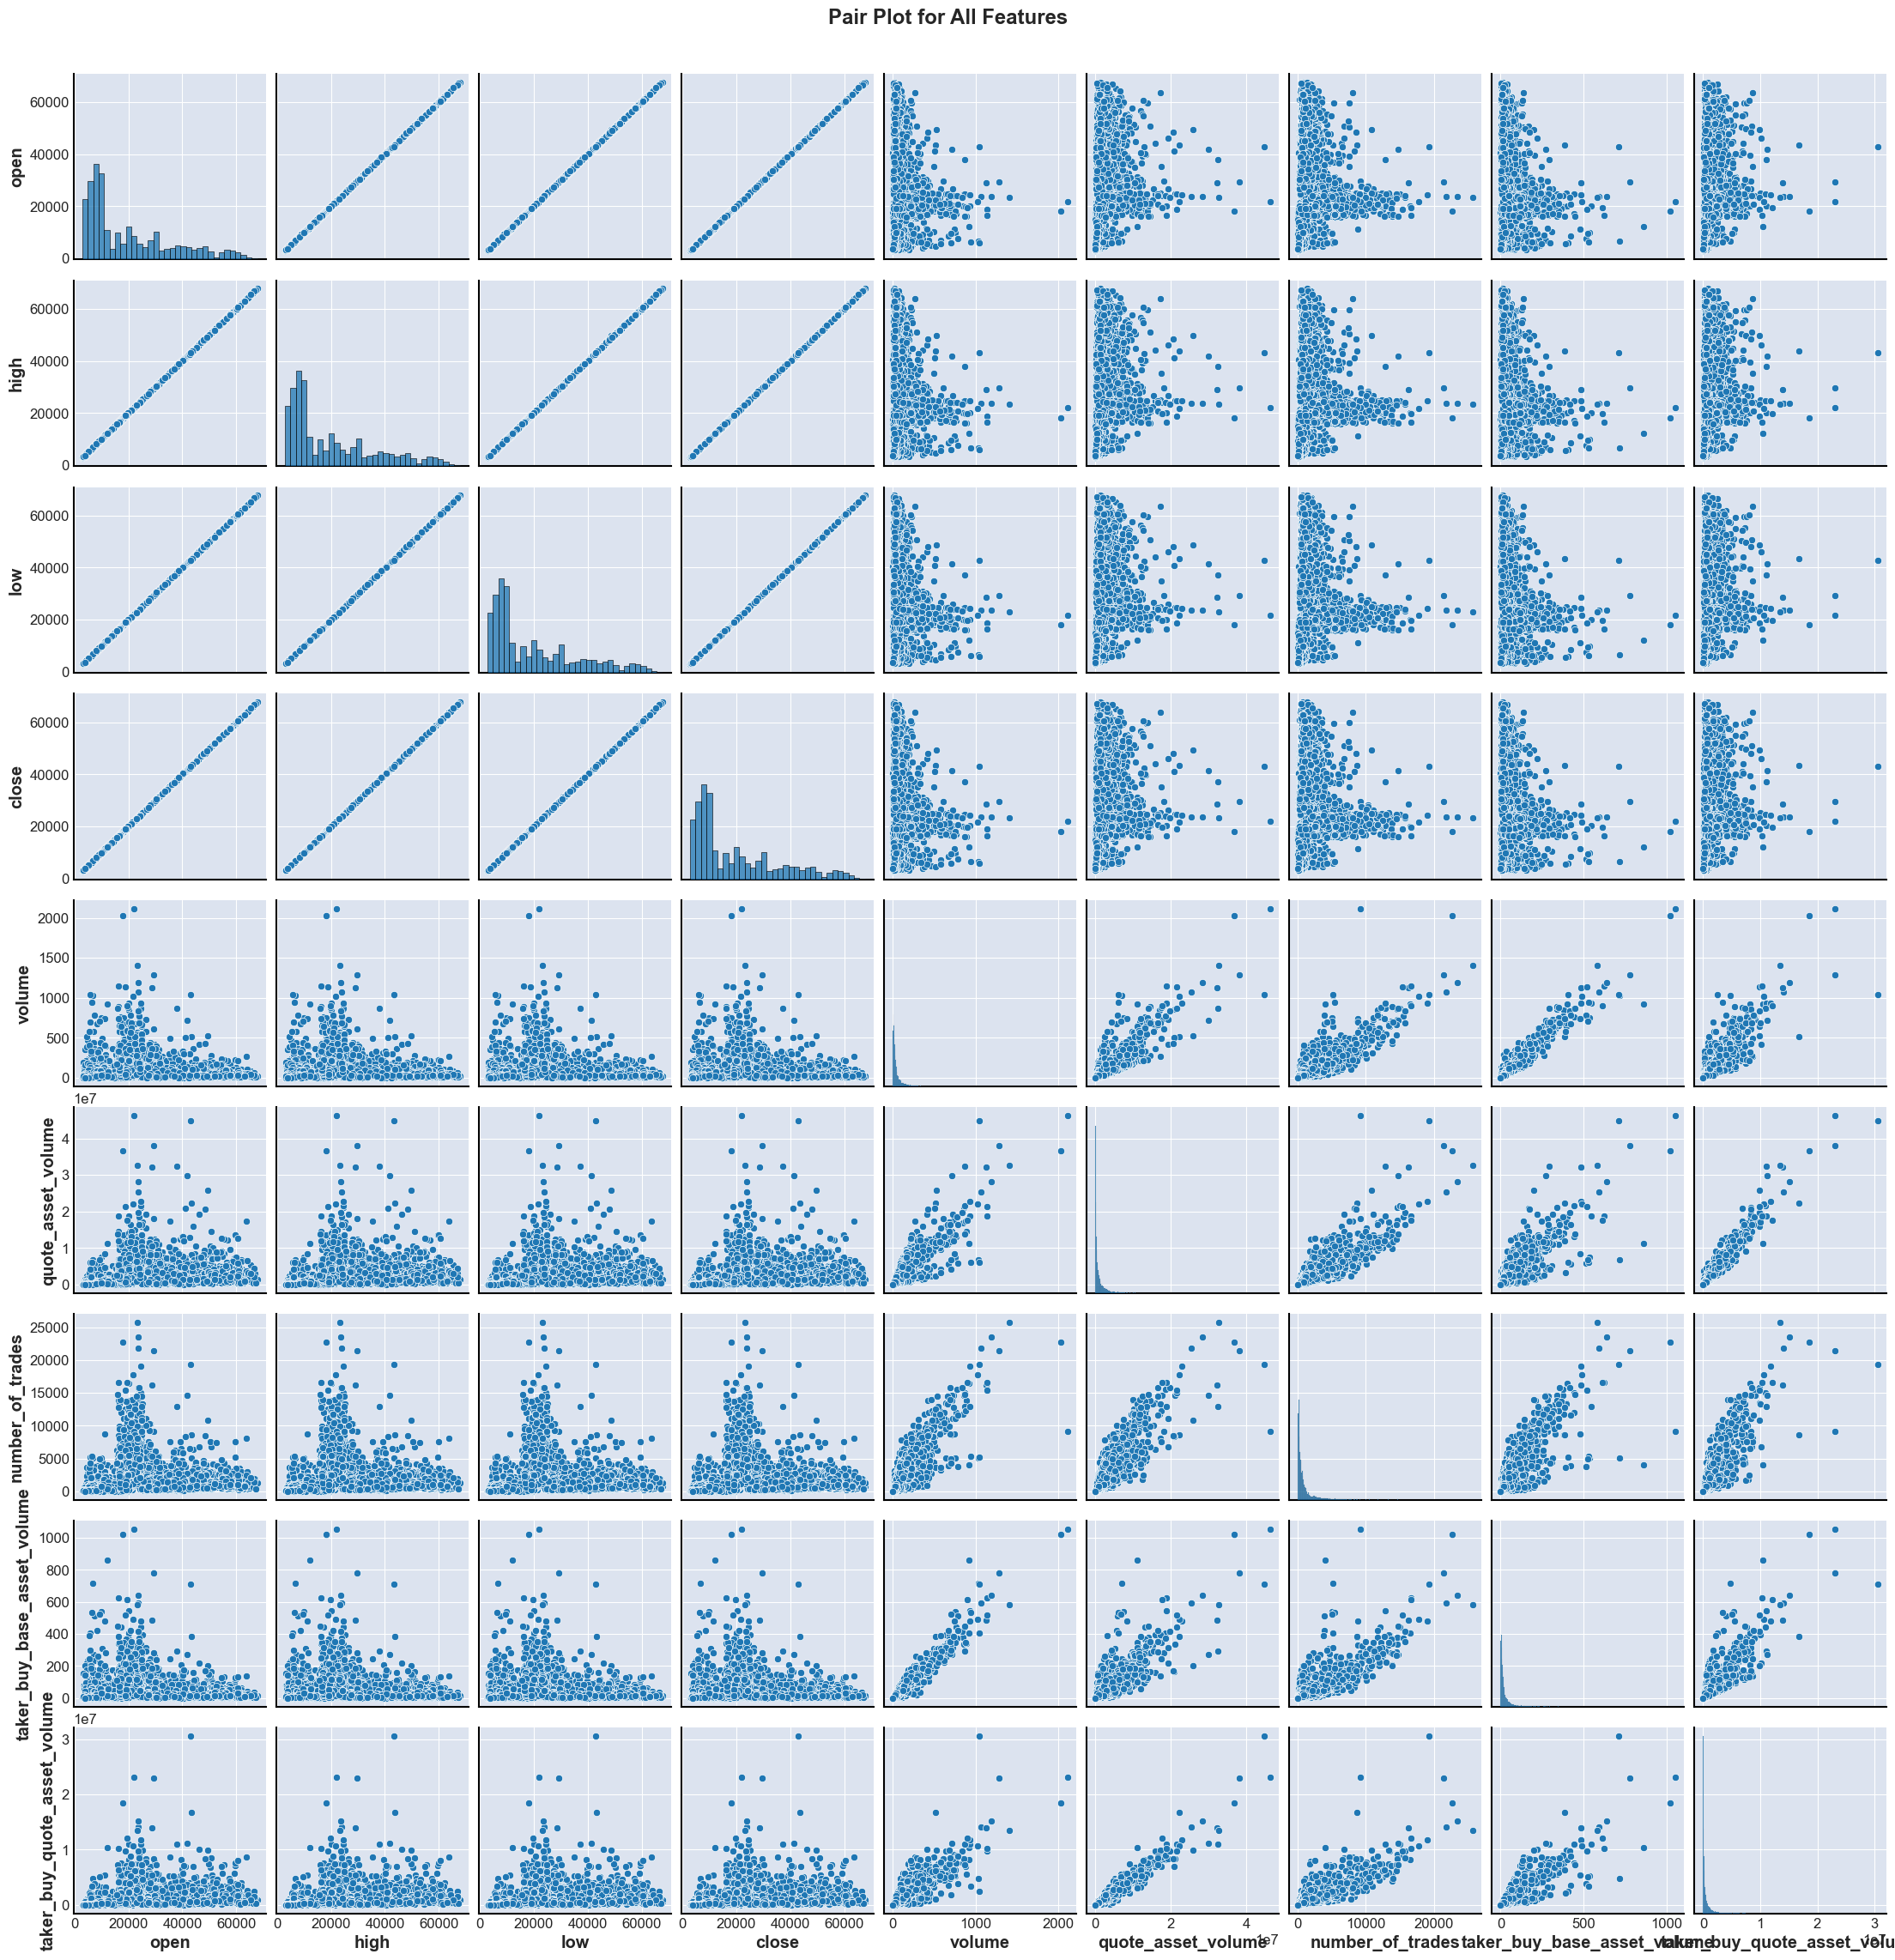

In [349]:
# Visualizing feature relationships

# Use a subset of the data for faster plotting 
sample_df = df.sample(n=10000, random_state=42)

# Create a pair plot
sns.pairplot(sample_df)
plt.suptitle('Pair Plot for All Features', y=1.02)
plt.show()


**Strong Linear Relationships Among Price Columns**
   - The features `open`, `high`, `low`, and `close` are highly correlated, as indicated by the tight diagonal lines in their scatter plots. This behavior is expected since these are related price indicators that typically move together.

**Skewed Distributions**
   - The histograms for `open`, `high`, `low`, and `close` show right-skewed distributions, suggesting the presence of higher values, possibly reflecting recent high prices or market volatility over time.

**Volume and Trade Activity Correlation**
   - Volume-related features (`volume`, `quote_asset_volume`, `taker_buy_base_asset_volume`, and `taker_buy_quote_asset_volume`) exhibit positive correlations among each other. The scatter plots show an upward trend, indicating that higher volumes generally coincide.

**Presence of Outliers**
   - There are visible outliers, especially in the volume-related features. These points might indicate extreme trading activities or unusual market conditions.

**Number of Trades vs Volume**
   - A positive relationship is observed between `number_of_trades` and `volume`, indicating that a higher number of trades often corresponds with increased trading volume.

**Non-linear Trends**
   - Some scatter plots, particularly for volume-related features, display non-linear patterns. This suggests that while there is a general correlation, it might not be strictly linear, indicating potential influences from other factors.



In [350]:
# Define the list of numerical features
numerical_features = [
    'open', 'high', 'low', 'close', 'volume',
    'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
]

# Set a higher threshold multiplier for outlier detection 
threshold = 2  

def detect_outliers(df, numerical_features, threshold):
    outlier_counts = {}
    
    for feature in numerical_features:
        Q1, Q3 = df[feature].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Count the number of outliers for the feature
        count_outliers = ((df[feature] < lower_bound) | (df[feature] > upper_bound)).sum()
        outlier_counts[feature] = count_outliers

    # Return the outlier counts as a DataFrame
    outlier_counts_df = pd.DataFrame(outlier_counts.items(), columns=['Feature', 'Outlier Count'])
    return outlier_counts_df

outlier_counts_df = detect_outliers(df, numerical_features, threshold=2.5)
print(outlier_counts_df)


                        Feature  Outlier Count
0                          open              0
1                          high              0
2                           low              0
3                         close              0
4                        volume         216664
5            quote_asset_volume         185216
6              number_of_trades         243336
7   taker_buy_base_asset_volume         214449
8  taker_buy_quote_asset_volume         192692


### Data Cleaning


This data has no missing values at all, so there is no need to handle it.

In [351]:
# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for any parsing issues (NaT indicates missing values)
print(df['timestamp'].isna().sum())

0


In [352]:
# Checking the conversion
df.dtypes

timestamp                       datetime64[ns]
open                                   float64
high                                   float64
low                                    float64
close                                  float64
volume                                 float64
quote_asset_volume                     float64
number_of_trades                         int64
taker_buy_base_asset_volume            float64
taker_buy_quote_asset_volume           float64
dtype: object

As we can see, the `timestamp` has been successfully converted to the `datetime64` type

In [353]:
# Sorting the dataset by the time in ascending order
df = df.sort_values('timestamp', ascending=True)

In [354]:
# Checking the sorting by time
df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [355]:
# Handling Outliers
# Apply log transformation
df['log_volume'] = np.log(df['volume'] + 1)
df['log_quote_asset_volume'] = np.log(df['quote_asset_volume'] + 1)
df['log_number_of_trades'] = np.log(df['number_of_trades'] + 1)
df['log_taker_buy_base_asset_volume'] = np.log(df['taker_buy_base_asset_volume'] + 1)
df['log_taker_buy_quote_asset_volume'] = np.log(df['taker_buy_quote_asset_volume'] + 1)

# Apply percentile-based capping to the log-transformed features
df['log_cap_volume'] = df['log_volume'].clip(lower=df['log_volume'].quantile(0.025), upper=df['log_volume'].quantile(0.975))
df['log_cap_quote_asset_volume'] = df['log_quote_asset_volume'].clip(lower=df['log_quote_asset_volume'].quantile(0.025), upper=df['log_quote_asset_volume'].quantile(0.975))
df['log_cap_number_of_trades'] = df['log_number_of_trades'].clip(lower=df['log_number_of_trades'].quantile(0.025), upper=df['log_number_of_trades'].quantile(0.975))
df['log_cap_taker_buy_base_asset_volume'] = df['log_taker_buy_base_asset_volume'].clip(lower=df['log_taker_buy_base_asset_volume'].quantile(0.025), upper=df['log_taker_buy_base_asset_volume'].quantile(0.975))
df['log_cap_taker_buy_quote_asset_volume'] = df['log_taker_buy_quote_asset_volume'].clip(lower=df['log_taker_buy_quote_asset_volume'].quantile(0.025), upper=df['log_taker_buy_quote_asset_volume'].quantile(0.975))



# Detect outliers before and after transformations and capping
transformed_outlier_features = ['log_cap_volume', 'log_cap_quote_asset_volume', 'log_cap_number_of_trades',
                      'log_cap_taker_buy_base_asset_volume', 'log_cap_taker_buy_quote_asset_volume']

outlier_featuers = ['volume', 'quote_asset_volume', 'number_of_trades',
                'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
]

# Before transformation outliers
outlier_counts_before = detect_outliers(df, outlier_featuers, threshold=2)
print("Outlier Counts Before Transformation:")
print(outlier_counts_before)

# After transformation and capping outliers
outlier_counts_after_transformation = detect_outliers(df, transformed_outlier_features, threshold=2)
print("\nOutlier Counts After Transformation and Capping:")
print(outlier_counts_after_transformation)


Outlier Counts Before Transformation:
                        Feature  Outlier Count
0                        volume         266222
1            quote_asset_volume         234506
2              number_of_trades         298816
3   taker_buy_base_asset_volume         263758
4  taker_buy_quote_asset_volume         242847

Outlier Counts After Transformation and Capping:
                                Feature  Outlier Count
0                        log_cap_volume              0
1            log_cap_quote_asset_volume              0
2              log_cap_number_of_trades              0
3   log_cap_taker_buy_base_asset_volume              0
4  log_cap_taker_buy_quote_asset_volume              0


After applying log transformation and percentile-based capping, the number of outliers in the features significantly decreased. Initially, the outlier counts for volume-related features were in the hundreds of thousands. After transformation and capping, all features showed zero outliers, indicating effective handling of extreme values.

### Feature Engineering

In [356]:
# Generating features based on the timestamp 
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['timestamp'].dt.weekday >= 5

Date-time features like hour, day of week, month, and weekend status capture temporal patterns that influence market behavior. For example, trading volumes and price volatility vary by time of day, day of week, or season. Including these features improves model accuracy by accounting for time-based trends and human behavior.

In [357]:
df['price_range'] = df['high'] - df['low']
df['price_change'] = df['close'] - df['close'].shift(1)
df['volume_to_trades_ratio'] = df['volume'] / df['number_of_trades']

Price and volume ratios are crucial for understanding market dynamics. The price range indicates volatility, price change captures momentum, and the volume-to-trades ratio reveals liquidity. These features help identify trends, volatility, and market activity, enhancing prediction accuracy for price movements and market behavior.

In [ ]:
# Confirm that our variables have been properly added
df[['price_range', 'price_change', 'volume_to_trades_ratio']].head()

,price_range,price_change,volume_to_trades_ratio
3125999,0.0,NaN,0.591728
3125998,0.0,0.00,NaN
3125997,0.0,19.08,0.130537
3125996,0.0,-19.08,0.004003
3125995,0.0,0.00,0.140796


We can see that the first instance has a NaN in `price_change`. That is because this is the first instance and there is no previous value of `low`. Also, `volume_to_trades_ratio` has a NaN in the second instance, as the number of trades is 0 and division by 0 returns NaN, but if there is more than 0 trades, then the volume is non-zero, meaning that we can simply assume that `volume_to_trades_ratio` is 0.

In [371]:
# Replace NaN values without using inplace
df['price_change'] = df['price_change'].fillna(0)
df['volume_to_trades_ratio'] = df['volume_to_trades_ratio'].fillna(0)

# Check the updated values
df[['price_range', 'price_change', 'volume_to_trades_ratio']].head()


,price_range,price_change,volume_to_trades_ratio
3125999,0.0,0.00,0.591728
3125998,0.0,0.00,0.000000
3125997,0.0,19.08,0.130537
3125996,0.0,-19.08,0.004003
3125995,0.0,0.00,0.140796


In [358]:
# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['hour', 'day_of_week', 'month'], drop_first=True)

Encoding categorical variables is crucial for machine learning models, which require numerical inputs. One-hot encoding ensures models understand time-based features like hour, day, or month, capturing meaningful patterns without assuming ordinality. It also prevents multicollinearity by dropping one category, improving model performance and preventing issues with correlated variables. `is_weekend` feature is already a `boolean` type, so it doesn't need to be encoded.

In [372]:
# Confirming the new features are successfully added and categorical variables are encoded properly

print(df[['is_weekend', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3',
       'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12']].dtypes)

is_weekend       bool
hour_1           bool
hour_2           bool
hour_3           bool
hour_4           bool
hour_5           bool
hour_6           bool
hour_7           bool
hour_8           bool
hour_9           bool
hour_10          bool
hour_11          bool
hour_12          bool
hour_13          bool
hour_14          bool
hour_15          bool
hour_16          bool
hour_17          bool
hour_18          bool
hour_19          bool
hour_20          bool
hour_21          bool
hour_22          bool
hour_23          bool
day_of_week_1    bool
day_of_week_2    bool
day_of_week_3    bool
day_of_week_4    bool
day_of_week_5    bool
day_of_week_6    bool
month_2          bool
month_3          bool
month_4          bool
month_5          bool
month_6          bool
month_7          bool
month_8          bool
month_9          bool
month_10         bool
month_11         bool
month_12         bool
dtype: object


We can clearly see that our categorical variables were properly encoded and our features have been added correctly.


In [ ]:
# Selecting numerical columns for standardization
numerical_cols = ['open', 'high', 'low', 'close', 'volume', 'quote_asset_volume',
                  'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
                  'log_volume', 'log_quote_asset_volume', 'log_number_of_trades',
                  'log_taker_buy_base_asset_volume', 'log_taker_buy_quote_asset_volume',
                  'log_cap_volume', 'log_cap_quote_asset_volume', 'log_cap_number_of_trades',
                  'log_cap_taker_buy_base_asset_volume', 'log_cap_taker_buy_quote_asset_volume',
                  'price_range', 'price_change', 'volume_to_trades_ratio']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Check that the dataframe was standardized
df.sample(10)


,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,log_volume,log_quote_asset_volume,log_number_of_trades,log_taker_buy_base_asset_volume,log_taker_buy_quote_asset_volume,log_cap_volume,log_cap_quote_asset_volume,log_cap_number_of_trades,log_cap_taker_buy_base_asset_volume,log_cap_taker_buy_quote_asset_volume,price_range,price_change,volume_to_trades_ratio
count,3126000,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2020-08-10 04:54:47.885027584,1.600199e-18,2.298467e-17,-1.323801e-16,-1.309253e-17,7.790058e-17,2.036616e-18,1.105592e-17,1.018308e-17,9.921231e-17,-5.237014e-18,-1.003761e-17,6.786297e-17,1.047403e-17,5.964377e-18,-1.280159e-17,-2.727611e-17,-5.946193e-17,-3.578626e-17,-2.691243e-17,-8.728356e-18,-1.704757e-18,1.047403e-17
min,2017-08-17 04:00:00,-1.074757e+00,-1.074858e+00,-1.075455e+00,-1.075565e+00,-5.412923e-01,-4.948406e-01,-5.603343e-01,-5.293172e-01,-4.800136e-01,-2.646033e+00,-5.944202e+00,-3.739896e+00,-2.186474e+00,-4.892978e+00,-2.418444e+00,-2.807970e+00,-2.778361e+00,-2.176769e+00,-3.171997e+00,-6.499783e-01,-7.439352e+01,-9.634507e-01
25%,2019-02-13 09:39:45,-7.761853e-01,-7.761762e-01,-7.761784e-01,-7.761812e-01,-4.266901e-01,-4.467928e-01,-4.778175e-01,-4.267465e-01,-4.370591e-01,-6.030508e-01,-4.804774e-01,-5.768552e-01,-6.523415e-01,-4.059329e-01,-6.207816e-01,-6.209807e-01,-6.210415e-01,-6.610965e-01,-5.732803e-01,-5.223609e-01,-1.812307e-01,-5.516838e-01
50%,2020-08-10 21:21:30,-5.224176e-01,-5.224488e-01,-5.224205e-01,-5.224162e-01,-2.970275e-01,-3.361644e-01,-3.331381e-01,-2.982660e-01,-3.330315e-01,-2.132515e-02,8.084963e-02,5.898718e-02,-4.449805e-02,1.030585e-01,-1.830191e-02,5.649153e-02,5.352941e-02,-3.742080e-02,7.310380e-02,-3.443079e-01,-2.753665e-04,-2.936669e-01
75%,2022-02-05 01:39:15,6.108804e-01,6.101756e-01,6.115044e-01,6.108806e-01,1.052038e-02,5.174947e-02,4.080363e-03,1.222192e-02,4.048490e-02,6.257261e-01,6.619905e-01,6.317520e-01,6.382281e-01,6.262493e-01,6.518340e-01,7.578772e-01,6.611808e-01,6.630880e-01,7.375202e-01,1.381419e-01,1.799813e-01,2.184816e-01
max,2023-08-01 13:19:00,3.045686e+00,3.042943e+00,3.035139e+00,3.045685e+00,5.959318e+01,6.198971e+01,5.847491e+01,7.060558e+01,7.451192e+01,4.442010e+00,2.888657e+00,3.562704e+00,4.745642e+00,2.682791e+00,2.063999e+00,1.702516e+00,1.831859e+00,2.115295e+00,1.632372e+00,1.000827e+02,7.391124e+01,1.170431e+02
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [388]:
# Check the statistics
df.describe()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,log_volume,log_quote_asset_volume,log_number_of_trades,log_taker_buy_base_asset_volume,log_taker_buy_quote_asset_volume,log_cap_volume,log_cap_quote_asset_volume,log_cap_number_of_trades,log_cap_taker_buy_base_asset_volume,log_cap_taker_buy_quote_asset_volume,price_range,price_change,volume_to_trades_ratio
count,3126000,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2020-08-10 04:54:47.885027584,1.600199e-18,2.298467e-17,-1.323801e-16,-1.309253e-17,7.790058e-17,2.036616e-18,1.105592e-17,1.018308e-17,9.921231e-17,-5.237014e-18,-1.003761e-17,6.786297e-17,1.047403e-17,5.964377e-18,-1.280159e-17,-2.727611e-17,-5.946193e-17,-3.578626e-17,-2.691243e-17,-8.728356e-18,-1.704757e-18,1.047403e-17
min,2017-08-17 04:00:00,-1.074757e+00,-1.074858e+00,-1.075455e+00,-1.075565e+00,-5.412923e-01,-4.948406e-01,-5.603343e-01,-5.293172e-01,-4.800136e-01,-2.646033e+00,-5.944202e+00,-3.739896e+00,-2.186474e+00,-4.892978e+00,-2.418444e+00,-2.807970e+00,-2.778361e+00,-2.176769e+00,-3.171997e+00,-6.499783e-01,-7.439352e+01,-9.634507e-01
25%,2019-02-13 09:39:45,-7.761853e-01,-7.761762e-01,-7.761784e-01,-7.761812e-01,-4.266901e-01,-4.467928e-01,-4.778175e-01,-4.267465e-01,-4.370591e-01,-6.030508e-01,-4.804774e-01,-5.768552e-01,-6.523415e-01,-4.059329e-01,-6.207816e-01,-6.209807e-01,-6.210415e-01,-6.610965e-01,-5.732803e-01,-5.223609e-01,-1.812307e-01,-5.516838e-01
50%,2020-08-10 21:21:30,-5.224176e-01,-5.224488e-01,-5.224205e-01,-5.224162e-01,-2.970275e-01,-3.361644e-01,-3.331381e-01,-2.982660e-01,-3.330315e-01,-2.132515e-02,8.084963e-02,5.898718e-02,-4.449805e-02,1.030585e-01,-1.830191e-02,5.649153e-02,5.352941e-02,-3.742080e-02,7.310380e-02,-3.443079e-01,-2.753665e-04,-2.936669e-01
75%,2022-02-05 01:39:15,6.108804e-01,6.101756e-01,6.115044e-01,6.108806e-01,1.052038e-02,5.174947e-02,4.080363e-03,1.222192e-02,4.048490e-02,6.257261e-01,6.619905e-01,6.317520e-01,6.382281e-01,6.262493e-01,6.518340e-01,7.578772e-01,6.611808e-01,6.630880e-01,7.375202e-01,1.381419e-01,1.799813e-01,2.184816e-01
max,2023-08-01 13:19:00,3.045686e+00,3.042943e+00,3.035139e+00,3.045685e+00,5.959318e+01,6.198971e+01,5.847491e+01,7.060558e+01,7.451192e+01,4.442010e+00,2.888657e+00,3.562704e+00,4.745642e+00,2.682791e+00,2.063999e+00,1.702516e+00,1.831859e+00,2.115295e+00,1.632372e+00,1.000827e+02,7.391124e+01,1.170431e+02
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Standardizing numerical features ensures that all features contribute equally to model performance. It prevents features with larger scales from dominating the model, improving training stability and accuracy. You can check by comparing feature distributions before and after scaling using histograms or summary statistics like mean and variance.

# Model Development


## Model Selection Research

After analyzing our dataset and problem characteristics, we'll implement and compare three different models:

### Linear Regression

**Strengths:**
- Simple and interpretable  
- Good baseline model  
- Can handle multiple features  

**Weaknesses:**  
- Assumes linear relationships  
- Sensitive to outliers  
- May not capture complex patterns  

---

### Random Forest Regressor

**Strengths:**  
- Can capture non-linear relationships  
- Handles outliers well  
- Provides feature importance  
- Less prone to overfitting  

**Weaknesses:**  
- More computationally intensive  
- Less interpretable than linear models  
- Requires more hyperparameter tuning  

---

### XGBoost Regressor

**Strengths:**  
- Generally provides excellent performance  
- Handles missing values  
- Built-in regularization  
- Feature importance ranking  

**Weaknesses:**  
- Most computationally intensive  
- Risk of overfitting if not properly tuned  
- Complex hyperparameter optimization  

---

These models were chosen to provide a range of complexity and capabilities, from simple linear relationships to complex non-linear patterns.


## Model Training

### Data Split 

In [ ]:

def prepare_features(df):
    """
    Prepare features for model training, selecting relevant columns and creating target variable
    """
    # Select features for prediction
    feature_columns = [
        'open', 'high', 'low', 'volume', 'number_of_trades',
        'price_range', 'price_change', 'volume_to_trades_ratio',
        'log_cap_volume', 'log_cap_number_of_trades',
        'is_weekend'
    ] + [col for col in df.columns if col.startswith(('hour_', 'day_of_week_', 'month_'))]
    
    X = df[feature_columns]
    # Target variable: next period's closing price
    y = df['close']
    
    return X, y

# Prepare features
X, y = prepare_features(df)

# Create TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=5)